In [2]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from pathlib import Path

In [3]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [4]:
IMAGES_PATH = Path() / "images" / "classification"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [5]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',as_frame=False)
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [6]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [7]:
X,y = mnist.data,mnist.target
X.shape

(70000, 784)

In [8]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [9]:
y.shape

(70000,)

In [10]:
X[0].shape

(784,)

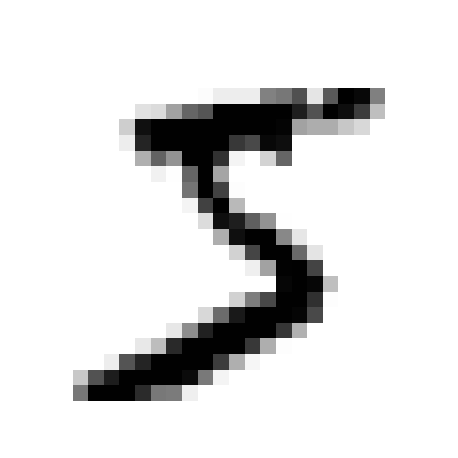

In [11]:
X.shape # (70000,784)
y.shape # (70000,)

import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28) # Have to convert one example of X into 2d array 
    # so the shape of X[0] (784,) and the reshaped X[0] is (28,28) 
    plt.imshow(image, cmap="binary")
    plt.axis("off")

some_digit = X[0]
plot_digit(some_digit)
save_fig("some_digit_plot")  # extra code
plt.show()

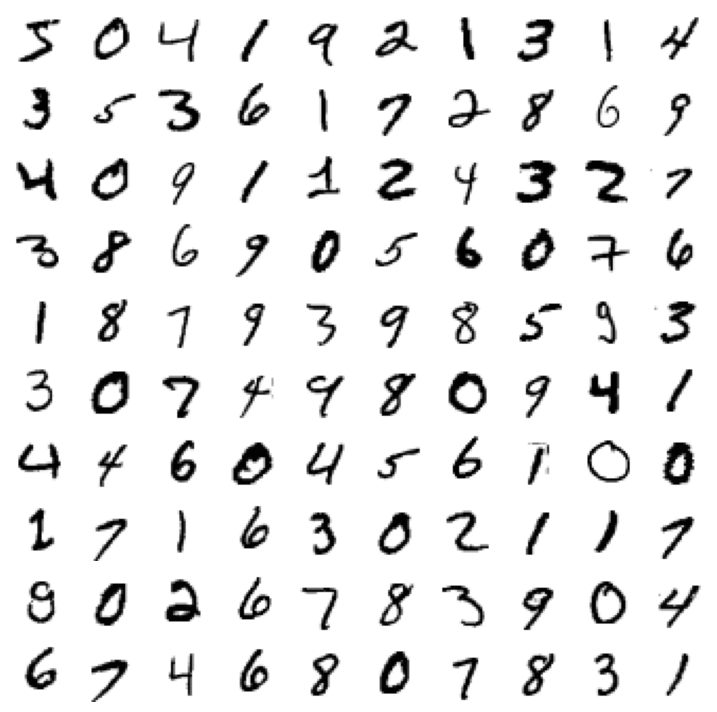

In [12]:
plt.figure(figsize=(9,9))
for idx,image_data in enumerate(X[:100]):
    plt.subplot(10,10,idx+1)
    plot_digit(image_data)
plt.show()

In [13]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

In [14]:
y_train_5 = (y_train == '5')
y_test_5 = (y_test == '5')

In [15]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [16]:
sgd_clf.predict([some_digit])

array([ True])

In [17]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy',n_jobs=-1)

array([0.95035, 0.96035, 0.9604 ])

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)

for train_index,test_index in skfolds.split(X_train,y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    accuracy = n_correct / len(y_pred)
    print(accuracy)

0.95035
0.96035
0.9604


In [19]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
print(any(dummy_clf.predict(X_train)))

False


In [20]:
cross_val_score(dummy_clf,X_train,y_train_5,cv=3,scoring='accuracy',n_jobs=-1)

array([0.90965, 0.90965, 0.90965])

In [21]:
from sklearn.model_selection import cross_val_predict 

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,n_jobs=-1)
y_train_pred.shape

(60000,)

In [22]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_train_5,y_pred=y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]])

In [23]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5,y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

In [24]:
from sklearn.metrics import precision_score,recall_score,f1_score

precision_score(y_true=y_train_5,y_pred=y_train_pred)

0.8370879772350012

In [25]:
recall_score(y_true=y_train_5,y_pred=y_train_pred)

0.6511713705958311

In [26]:
f1_score(y_true=y_train_5,y_pred=y_train_pred)

0.7325171197343847

In [27]:
y_scores = sgd_clf.decision_function([some_digit])
print(y_scores.shape)
y_scores

(1,)


array([2164.22030239])

In [28]:
threshold = 0 
y_some_digit_pred = y_scores > threshold 
y_some_digit_pred

array([ True])

In [29]:
y_scores > 0

array([ True])

In [30]:
threshold = 3000
y_some_digit = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [31]:
y_scores =  cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,n_jobs=-1,method='decision_function')
print(y_scores.shape)
print(y_scores[:2])

(60000,)
[  1200.93051237 -26883.79202424]


In [32]:
from sklearn.metrics import precision_recall_curve

precisions,recalls,thresholds = precision_recall_curve(y_true=y_train_5,y_score=y_scores)
precisions.shape,recalls.shape,thresholds.shape

((60001,), (60001,), (60000,))

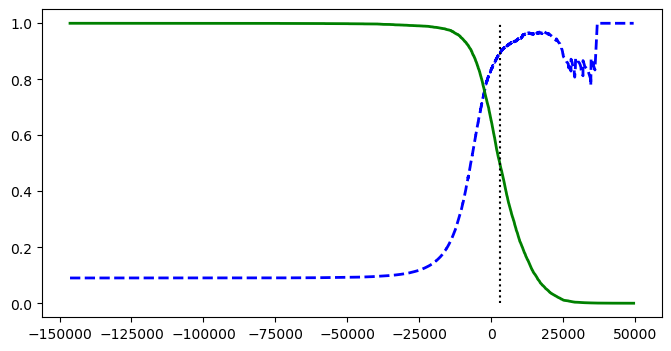

In [33]:
plt.figure(figsize=(8,4))
plt.plot(thresholds,precisions[:-1],label='Precision',color='b',linestyle='--',linewidth=2)
plt.plot(thresholds,recalls[:-1],label='Recalls',color='g',linestyle='-',linewidth=2)
plt.vlines(threshold,0,1.0,'k','dotted',label='threshold')
# idx  = 

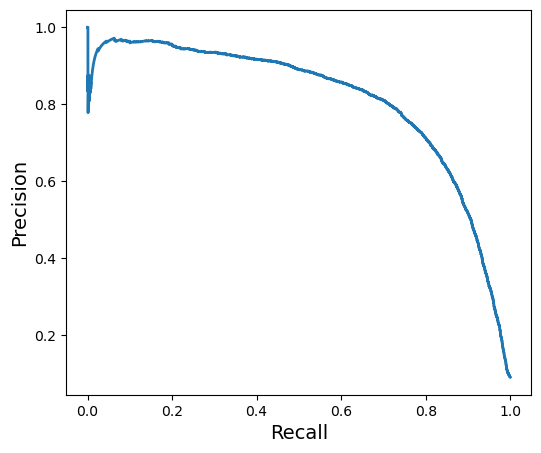

In [34]:
# import matplotlib.patches as patches 

plt.figure(figsize=(6,5))
plt.plot(recalls,precisions,linewidth=2,label='Precision/Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [35]:
idx_for_precision_90 = (precisions >= .90).argmax()
threshold_for_90_precision = thresholds[idx_for_precision_90]
print(threshold_for_90_precision)

3370.0194991439557


In [36]:
y_train_pred_90 = (y_scores >= threshold_for_90_precision)

In [37]:
precision_score(y_true=y_train_5,y_pred=y_train_pred_90)

0.9000345901072293

In [38]:
recall_score(y_true=y_train_5,y_pred=y_train_pred_90)

0.4799852425751706

In [39]:
from sklearn.metrics import roc_curve 

fpr,tpr,thresholds = roc_curve(y_true=y_train_5,y_score=y_scores)

In [40]:
thresholds[:5]

array([           inf, 49441.43765905, 36801.60697028, 35987.20307515,
       34662.20950045])

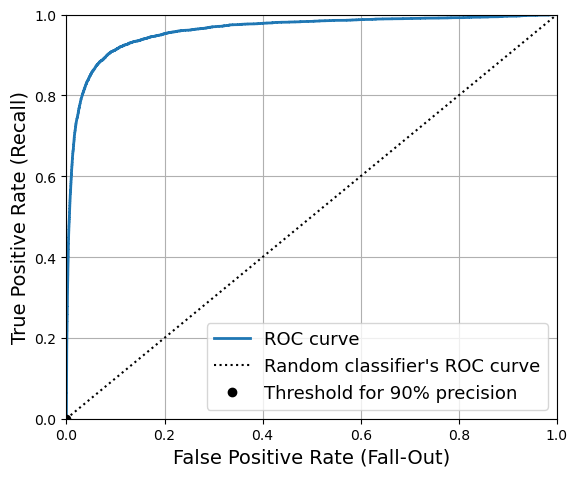

In [41]:
idx_for_threshold_at_90 = (threshold <= threshold_for_90_precision).argmax()
tpr_90,fpr_90 = tpr[idx_for_threshold_at_90],fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)
save_fig("roc_curve_plot")

plt.show()

In [42]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

np.float64(0.9604938554008616)

In [43]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=30,
                                    n_jobs=-1,
                                    max_depth=10,
                                    max_features='sqrt',
                                    random_state=42)

# random forest does not have decision_function 
# We can make use of the predict_proba method instead

In [44]:
y_probas_forest = cross_val_predict(forest_clf,X_train,y_train_5,
                                    cv=3,method='predict_proba',n_jobs=-1)
print(y_probas_forest.shape)
print(y_probas_forest[:3])

(60000, 2)
[[0.21362053 0.78637947]
 [0.97671373 0.02328627]
 [0.9911471  0.0088529 ]]


In [45]:
# Filter the samples where the prob of being 5 is bet 50%-60%

idx_50_to_60 = (y_probas_forest[:,1] >= 0.50) & (y_probas_forest[:,1] < 0.60)
n_samples_percent = y_train_5[idx_50_to_60].sum() / sum(idx_50_to_60)
print(f"Percentage of samples being 5 is between 50%-60% : {n_samples_percent:.1%}")


Percentage of samples being 5 is between 50%-60% : 94.0%


In [46]:
y_scores_forest = y_probas_forest[:,1]
print(y_scores_forest[:3]) 
precisions_forest,recalls_forest,thresholds = precision_recall_curve(y_true=y_train_5,y_score=y_scores_forest)


[0.78637947 0.02328627 0.0088529 ]


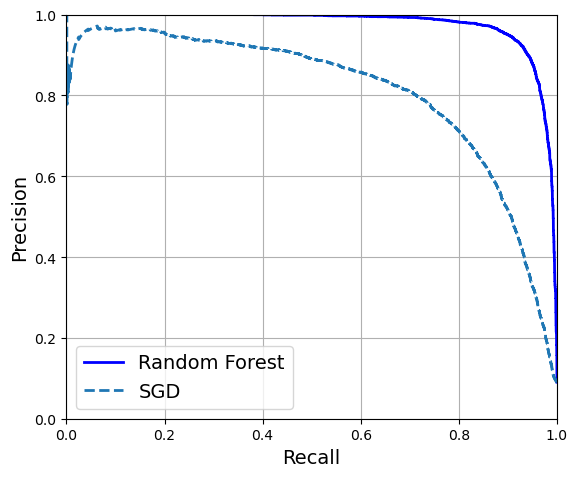

In [47]:
plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting

plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="Random Forest")
plt.plot(recalls, precisions, "--", linewidth=2, label="SGD")

# extra code – just beautifies and saves Figure 3–8
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.axis([0, 1, 0, 1])
plt.grid()
plt.legend(loc="lower left")
save_fig("pr_curve_comparison_plot")

plt.show()

# Multiclass Classification 

In [48]:
from sklearn.svm import SVC 

svm_clf = SVC(random_state=42)
svm_clf.fit(X_train[:2000],y_train[:2000])

SVC(random_state=42)

In [49]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [50]:
some_digit_scores = svm_clf.decision_function([some_digit])
some_digit_scores.round(2)

array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])

In [51]:
class_id = some_digit_scores.argmax()
class_id

np.int64(5)

In [52]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [53]:
svm_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [54]:
svm_clf.classes_[class_id]

'5'

In [55]:
svm_clf.decision_function_shape = 'ovo' 
#  we will get all the scores of 45 classifiers  
some_digit_scores_ovo = svm_clf.decision_function([some_digit]) 
some_digit_scores_ovo.round(2)

array([[ 0.11, -0.21, -0.97,  0.51, -1.01,  0.19,  0.09, -0.31, -0.04,
        -0.45, -1.28,  0.25, -1.01, -0.13, -0.32, -0.9 , -0.36, -0.93,
         0.79, -1.  ,  0.45,  0.24, -0.24,  0.25,  1.54, -0.77,  1.11,
         1.13,  1.04,  1.2 , -1.42, -0.53, -0.45, -0.99, -0.95,  1.21,
         1.  ,  1.  ,  1.08, -0.02, -0.67, -0.14, -0.3 , -0.13,  0.25]])

In [56]:
# We can force ovr on svm like this 
from sklearn.multiclass import OneVsRestClassifier

ovr_clf = OneVsRestClassifier(SVC(random_state=42),n_jobs=-1)
ovr_clf.fit(X_train[:2000],y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42), n_jobs=-1)

In [57]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [58]:
len(ovr_clf.estimators_)

10

In [59]:
sgd_clf = SGDClassifier(random_state=42,max_iter=100)
sgd_clf.fit(X_train,y_train)


c:\Users\rsurs\anaconda3\envs\torch\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(max_iter=100, random_state=42)

In [60]:
sgd_clf.decision_function([some_digit])

array([[-16452.02382832, -32934.81594055, -13930.95879438,
          9433.96512015, -41793.69914973,   7001.24836964,
        -36148.61925326, -23636.17638294, -35304.96978572,
        -19356.39286541]])

In [61]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy",n_jobs=-1)

array([0.87285, 0.8738 , 0.86985])

In [62]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype("float64"))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy",n_jobs=-1)

array([0.9082 , 0.9089 , 0.91365])

c:\Users\rsurs\anaconda3\envs\torch\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\rsurs\anaconda3\envs\torch\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
c:\Users\rsurs\anaconda3\envs\torch\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


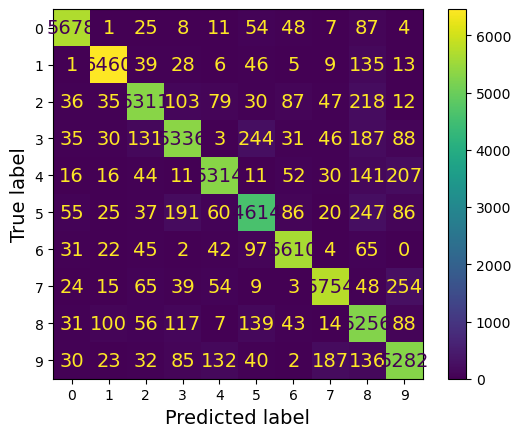

In [63]:
from sklearn.metrics import ConfusionMatrixDisplay

y_train_pred = cross_val_predict(sgd_clf,X_train_scaled,y_train,cv=3)
ConfusionMatrixDisplay.from_predictions(y_true=y_train,y_pred=y_train_pred)
plt.show()

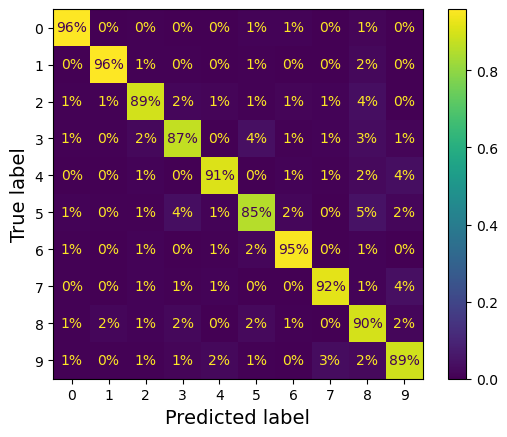

In [64]:
plt.rc('font', size=10)  # extra code
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        normalize="true", values_format=".0%")
plt.show()

In [65]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
print(y_train_large[:5])
y_train_odd = (y_train.astype('int8') % 2 == 1)
print(y_train_odd[:5])
y_multilabel = np.c_[y_train_large,y_train_odd]
print(y_multilabel[:3],y_multilabel.shape)
knn_clf = KNeighborsClassifier(n_jobs=-1)
knn_clf.fit(X_train,y_multilabel)

[False False False False  True]
[ True False False  True  True]
[[False  True]
 [False False]
 [False False]] (60000, 2)


KNeighborsClassifier(n_jobs=-1)

In [66]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [67]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3,n_jobs=-1)
f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.9764102655606048

In [68]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(),cv=3,random_state=42)
chain_clf.fit(X_train[:2000],y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [69]:
chain_clf.predict([some_digit])

array([[0., 1.]])

# Multioutput classification 

In [70]:
np.random.seed(42)
noise = np.random.randint(0,100,(len(X_train),784))
X_train_mod = X_train + noise 
noise = np.random.randint(0,100,(len(X_test),784))
X_test_mod = X_test + noise 
y_train_mod = X_train
y_test_mod = X_test


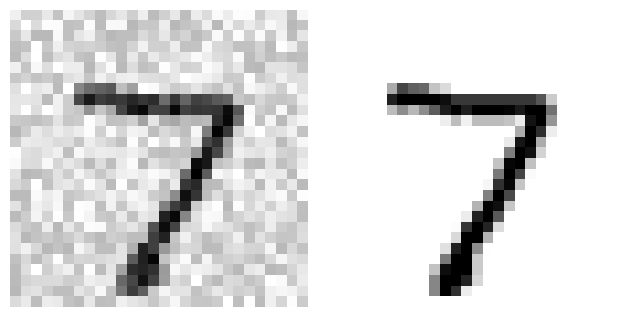

In [71]:
# extra code – this cell generates and saves Figure 3–12
plt.subplot(121); plot_digit(X_test_mod[0])
plt.subplot(122); plot_digit(y_test_mod[0])
save_fig("noisy_digit_example_plot")
plt.show()

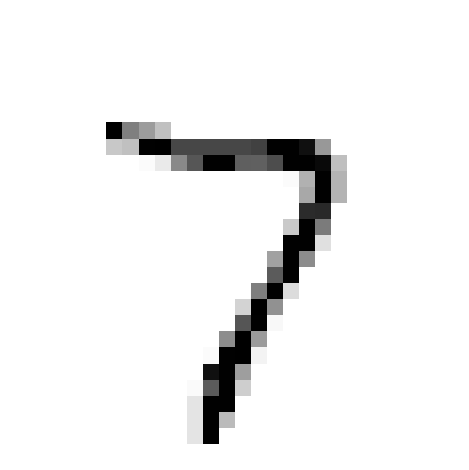

In [72]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[0]])
plot_digit(clean_digit)
save_fig("cleaned_digit_example_plot")  # extra code – saves Figure 3–13
plt.show()

Exercise: _Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the `KNeighborsClassifier` works quite well for this task; you just need to find good hyperparameter values (try a grid search on the `weights` and `n_neighbors` hyperparameters)._

In [73]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(n_jobs=-1)
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1)

In [74]:
y_scores = cross_val_score(knn_clf,X_train,y_train,cv=3,n_jobs=-1,scoring='accuracy')
print(y_scores)
# knn_clf.score(X_train,y_train) 

[0.9676  0.9671  0.96755]


In [75]:
y_pred = knn_clf.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score 
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy on test:{accuracy}")

Accuracy on test:0.9688


In [79]:
from sklearn.model_selection import GridSearchCV

param_grid = [{'n_neighbors':[3,4,5,6,7],
               'weights':['uniform']},
               {'n_neighbors':[5,6,7,8,9],
               'weights':['distance']}]

knn_clf_grid_search = GridSearchCV(knn_clf,param_grid=param_grid,
                           cv=3,scoring='accuracy',n_jobs=-1)

knn_clf_grid_search.fit(X_train[:10_000],y_train[:10_000])


GridSearchCV(cv=3, estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid=[{'n_neighbors': [3, 4, 5, 6, 7],
                          'weights': ['uniform']},
                         {'n_neighbors': [5, 6, 7, 8, 9],
                          'weights': ['distance']}],
             scoring='accuracy')

In [81]:
print(f"Best accuracy score on cv:{knn_clf_grid_search.best_score_}")
print(f"Best parameters:{knn_clf_grid_search.best_params_}")

Best accuracy score on cv:0.9372997587701182
Best parameters:{'n_neighbors': 6, 'weights': 'distance'}


In [82]:
best_model = knn_clf_grid_search.best_estimator_
best_model.fit(X_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=6, weights='distance')

In [83]:
tuned_accuracy = knn_clf_grid_search.score(X_test,y_test)
print(f"Tuned accuracy:{tuned_accuracy}")

Tuned accuracy:0.9709


Exercise: _Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. You can use the `shift()` function from the `scipy.ndimage` module. For example, `shift(image, [2, 1], cval=0)` shifts the image two pixels down and one pixel to the right. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called _data augmentation_ or _training set expansion_._

In [84]:
from scipy.ndimage import shift 

In [86]:
def shift_image(image,dx,dy):
    image = image.reshape(28,28)
    shifted_image = shift(image,[dy,dx],cval=0,mode='constant')
    return shifted_image.reshape([-1])

image shape:  (28, 28)
shifted_image_down shape: (784,)
shifted_image up shape: (784,)


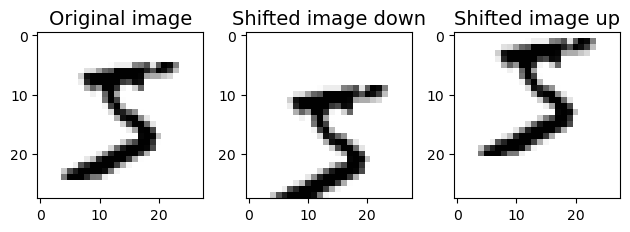

In [97]:
image = X[0]
image = image.reshape(28,28)
print("image shape: ",image.shape)
plt.subplot(1,3,1)
plt.imshow(image,cmap='binary')
plt.title('Original image')

shifted_image_down = shift_image(image,0,4)
plt.subplot(1,3,2)
print('shifted_image_down shape:',shifted_image_down.shape)
plt.imshow(shifted_image_down.reshape(28,28),cmap='binary')
plt.title('Shifted image down')

shifted_image_up = shift_image(image,0,-4)
plt.subplot(1,3,3)
print('shifted_image up shape:',shifted_image_up.shape)
plt.imshow(shifted_image_up.reshape(28,28),cmap='binary')
plt.title('Shifted image up')
plt.tight_layout()
plt.show()



In [100]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx,dy in ((-1,0),(1,0),(0,1),(0,-1)):
    for image,label in zip(X_train,y_train):
        X_train_augmented.append(shift_image(image,dy,dx))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

print(X_train_augmented.shape,y_train_augmented.shape)

(300000, 784) (300000,)


In [101]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]
print(X_train_augmented[:4])
print(y_train_augmented[:4])


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['3' '5' '8' '4']


In [103]:
knn_clf = KNeighborsClassifier(**knn_clf_grid_search.best_params_)
knn_clf.fit(X_train_augmented,y_train_augmented)

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [104]:
augmented_accuracy = knn_clf.score(X_test,y_test)
print(f"Augmented accuracy:{augmented_accuracy}")

Augmented accuracy:0.9772


In [105]:
error_rate_change = (1 - augmented_accuracy) / (1 - tuned_accuracy) - 1
print(f"error_rate_change = {error_rate_change:.0%}")

error_rate_change = -22%


Exercise: _Tackle the Titanic dataset. A great place to start is on [Kaggle](https://www.kaggle.com/c/titanic). Alternatively, you can download the data from https://homl.info/titanic.tgz and unzip this tarball like you did for the housing data in Chapter 2. This will give you two CSV files: _train.csv_ and _test.csv_ which you can load using `pandas.read_csv()`. The goal is to train a classifier that can predict the `Survived` column based on the other columns._

In [106]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_titanic_data():
    tarball_path = Path("datasets/titanic.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/titanic.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as titanic_tarball:
            titanic_tarball.extractall(path="datasets")
    return [pd.read_csv(Path("datasets/titanic") / filename)
            for filename in ("train.csv", "test.csv")]

In [107]:
train_data,test_data = load_titanic_data()

In [108]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<li>SibSp: how many siblings & spouses of the passenger aboard the Titanic.
<li>Parch: how many children & parents of the passenger aboard the Titanic.

In [109]:
train_data = train_data.set_index('PassengerId')
test_data = test_data.set_index('PassengerId')

In [ ]:
train_data.info() 
# We have a few missing values in Age,Cabin,Embarked

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [111]:
train_data[train_data['Sex'] == 'female']['Age'].median()

27.0

In [112]:
train_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699113,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526507,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.416700,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [113]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [114]:
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [115]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [123]:
from sklearn.pipeline import Pipeline 
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
     ('scaler',StandardScaler())
])

In [124]:
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder

cat_pipeline = Pipeline([
    ('ordinal_encoder',OrdinalEncoder()),
    ('imputer',SimpleImputer(strategy='most_frequent')),
     ('cat_encoder',OneHotEncoder(sparse_output=False))
])

In [125]:
from sklearn.compose import ColumnTransformer

num_attribs = ['Age','SibSp','Parch','Fare']
cat_attribs = ['Pclass','Sex','Embarked']

preprocess_pipeline = ColumnTransformer([
    ('num',num_pipeline,num_attribs),
    ('cat',cat_pipeline,cat_attribs)
])

In [127]:
X_train = preprocess_pipeline.fit_transform(train_data)
print('X_train shape:',X_train.shape)
print(X_train[:3])

X_train shape: (891, 12)
[[-0.56573582  0.43279337 -0.47367361 -0.50244517  0.          0.
   1.          0.          1.          0.          0.          1.        ]
 [ 0.6638609   0.43279337 -0.47367361  0.78684529  1.          0.
   0.          1.          0.          1.          0.          0.        ]
 [-0.25833664 -0.4745452  -0.47367361 -0.48885426  0.          0.
   1.          1.          0.          0.          0.          1.        ]]


In [128]:
y_train = train_data['Survived']

In [130]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=30,n_jobs=-1,
                                    max_depth=10,max_features='sqrt',
                                    min_samples_leaf=5,
                                    random_state=42)

forest_clf.fit(X_train,y_train)


RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=30,
                       n_jobs=-1, random_state=42)

In [131]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = forest_clf.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf,X_train,y_train,cv=10,n_jobs=-1,scoring='accuracy')
print('Accuracy of forest clf:',forest_scores.mean())

Accuracy of forest clf: 0.8294382022471909


In [133]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto')
svm_scores = cross_val_score(svm_clf,X_train,y_train,cv=10,n_jobs=-1,scoring='accuracy')
print('accuracy of svm scores:',svm_scores.mean())

accuracy of svm scores: 0.8249313358302123


C:\Users\rsurs\AppData\Local\Temp\ipykernel_13392\3995193800.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([svm_scores, forest_scores], labels=("SVM", "Random Forest"))


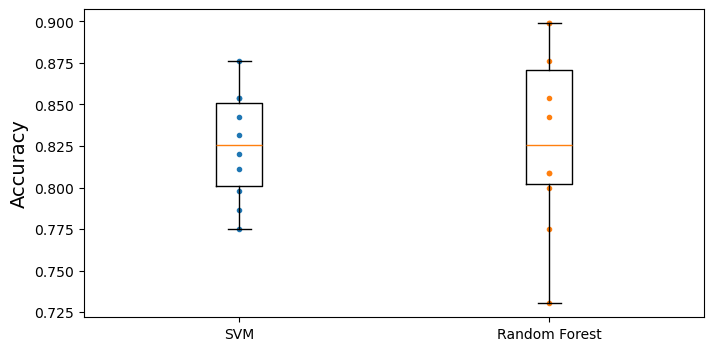

In [134]:
plt.figure(figsize=(8, 4))
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")
plt.boxplot([svm_scores, forest_scores], labels=("SVM", "Random Forest"))
plt.ylabel("Accuracy")
plt.show()

In [135]:
train_data["AgeBucket"] = train_data["Age"] // 15 * 15
train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [136]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(
    ['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000
